# Programa Ingenias+ Data Science




## Analisis Exploratorio de un Dataset

Esta notebook les permitiria ejercitar los conceptos de Pandas 🐼  y Análisis exploratorio de datos 📊 que aprendimos hasta ahora. Vamos a trabajar con un dataset que contiene datos relativos a [clientes de un centro comercial](https://www.kaggle.com/akram24/mall-customers). En el Drive esta descargado el archivo. Si tenes inconvenientes o  ese archivo no funciona podes descargarlo directamente de la página web.

### 🔬 Comenzando el proyecto 🎉

Es tu primer dia como Data Scientist. Tu primer proyecto consiste en hacer un análisis de datos sobre clientes de un centro comercial para luego hacer una predicción de ventas o un analisis de cluster. Antes que nada, debes inspeccionar y visualizar tu dataset para saber con que datos estas trabajando.

Como mencionamos durante la clase, una de las primeras cosas que debe realizar un Data Scientist al iniciar un nuevo proyecto es conocer el dataset con el cual va a trabajar. Este paso se conoce como _"Analisis exploratorio de los datos"_.

Además de obtener que tipo de datos contiene el dataset, estadistica descriptiva, detectar problemas como valores faltantes, establecer que tipo de relación existe entre las distintas variables, también debemos visualizar los datos. Este análisis nos permitira hacernos preguntas que puedan ser contestadas con el dataset como así plantear estrategias para poder resolver problemas presentes en él.

#### IMPORTA LAS LIBRERIAS NECESARIAS

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

#### LEE LOS DATOS

**_Lee los datos que se encuentran en el archivo `clientes_mall.csv`. Guardalos en un DataFrame._**

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/GabiMiranda05/data-science-portfolio/refs/heads/main/Ejercicios-python/clientes_mall.csv")

In [4]:
df.head()

,Unnamed: 0,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,0,1.0,Male,19.0,15.0,39.0
1,1,2.0,NaN,21.0,15.0,81.0
2,2,3.0,Female,20.0,16.0,6.0
3,3,4.0,Female,23.0,16.0,77.0
4,4,5.0,NaN,31.0,17.0,40.0


#### INSPECCIONA LOS DATOS

Primero obtene una visión general del dataset:


🤔 &nbsp; **_¿Como se ven las primeras 5 filas? ¿Cuantas filas y columnas posee? ¿Que tipos de datos contiene cada una de las columnas?_**

In [5]:
# Primeras 5 filas del Dataframe
df.head(5)

,Unnamed: 0,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,0,1.0,Male,19.0,15.0,39.0
1,1,2.0,NaN,21.0,15.0,81.0
2,2,3.0,Female,20.0,16.0,6.0
3,3,4.0,Female,23.0,16.0,77.0
4,4,5.0,NaN,31.0,17.0,40.0


In [6]:
# Cantidad de Filas y columnas
filas, columnas = df.shape
print(f"Cantidad de filas: {filas}")
print(f"Cantidad de columnas: {columnas}")

Cantidad de filas: 200
Cantidad de columnas: 6


In [7]:
# Tipos de datos de cada columna
df.dtypes

,0
Unnamed: 0,int64
CustomerID,float64
Genre,object
Age,float64
Annual Income (k$),float64
Spending Score (1-100),float64


**_Hay algunas columnas que tienen nombres incomodos (ej. `Spending Score (1-100)` y `Annual Income (k$)`). Renombra esas columnas_**

In [8]:
# Renombrar columnas Spending Score y Annual Income
df.rename(columns={'Spending Score (1-100)':'Spending_Score', 'Annual Income (k$)':'Annual_Income'}, inplace=True)

In [9]:
df.head()

,Unnamed: 0,CustomerID,Genre,Age,Annual_Income,Spending_Score
0,0,1.0,Male,19.0,15.0,39.0
1,1,2.0,NaN,21.0,15.0,81.0
2,2,3.0,Female,20.0,16.0,6.0
3,3,4.0,Female,23.0,16.0,77.0
4,4,5.0,NaN,31.0,17.0,40.0


#### Valores faltantes

🤔 &nbsp; **_¿Hay valores faltantes en alguna de las columnas?_**

In [10]:
# Valores faltantes en las columnas
df.isnull().sum()

,0
Unnamed: 0,0
CustomerID,11
Genre,14
Age,11
Annual_Income,15
Spending_Score,14


**_Elimina todas las filas que tengan valores faltantes_**

In [11]:
# Elimino filas que tengan valores faltantes
df_sin_faltantes = df.dropna()

In [12]:
df_sin_faltantes.isnull().sum()

,0
Unnamed: 0,0
CustomerID,0
Genre,0
Age,0
Annual_Income,0
Spending_Score,0


#### FILTRA LOS DATOS

Porque tu compañia quiere diseñar un a campaña de marketing especial para personas entre 25 y 40 años, vamos a analizar los datos solo para estos clientes.

🤔 &nbsp; **_Chequea que categorias aparecen en la columna `Age`_**.

In [13]:
# Categorías que aparecen en la columna Age
df_sin_faltantes['Age'].unique()

array([19., 20., 23., 22., 30., 67., 35., 58., 24., 37., 25., 31., 54.,
       29., 45., 40., 60., 49., 42., 36., 50., 27., 33., 59., 47., 53.,
       70., 63., 18., 68., 32., 26., 57., 38., 46., 21., 48., 34., 66.,
       65., 51., 43., 39., 44., 28., 41.])

**_Filtra los datos para quedarte unicamente con las filas que correspondan a personas entre 25 y 40 años. Guardalo en una variable que se llame `clientes_seleccionados`._**

In [14]:
clientes_seleccionados = df_sin_faltantes[(df_sin_faltantes['Age'] >= 25) & (df_sin_faltantes['Age'] <= 40)]

In [15]:
clientes_seleccionados.head()

,Unnamed: 0,CustomerID,Genre,Age,Annual_Income,Spending_Score
9,9,10.0,Female,30.0,19.0,72.0
11,11,12.0,Female,35.0,19.0,99.0
14,14,15.0,Male,37.0,20.0,13.0
16,16,17.0,Female,35.0,21.0,35.0
19,19,20.0,Female,35.0,23.0,98.0


**_Reiniciamos el indice usando `reset_index()` para que las filas vuelvan a ser numeradas a partir de 0. `drop=True` permite descartar los indices anteriores y no guardarlos como una nueva columna. `inplace=True` permite que se modifique el DataFrame original._**

In [16]:
clientes_seleccionados.reset_index(drop=True, inplace=True)

In [17]:
clientes_seleccionados.head()

,Unnamed: 0,CustomerID,Genre,Age,Annual_Income,Spending_Score
0,9,10.0,Female,30.0,19.0,72.0
1,11,12.0,Female,35.0,19.0,99.0
2,14,15.0,Male,37.0,20.0,13.0
3,16,17.0,Female,35.0,21.0,35.0
4,19,20.0,Female,35.0,23.0,98.0


**_Obtene estadistica descriptiva para las columnas que corresponden al salario anual y puntaje de gastos de las personas entre 25 y 40 años. Lo importante es que se muestre promedio, mediana, desvio estandard, valores minimos y maximos._**

In [18]:
# Estadística descriptiva

clientes_seleccionados[["Annual_Income", "Spending_Score"]].describe()

,Annual_Income,Spending_Score
count,61.00000,61.000000
mean,67.04918,56.639344
std,28.81286,28.287237
min,19.00000,1.000000
25%,43.00000,35.000000
50%,72.00000,58.000000
75%,81.00000,78.000000
max,137.00000,99.000000


El promedio se representa con "mean", la mediana aparece como "50%" (percentil), la desviación estándar esta representada como "std".

🤔 &nbsp; De acuerdo a los valores **_¿Cuál es el sueldo promedio de estos clientes? ¿Cual es el puntaje de gastos mediano en el grupo? ¿Crees que son buenas medidas para caracterizar el grupo?_**

In [23]:
# Sueldo promedio de los clientes según describe() es 67.04918

In [24]:
# El Puntaje de gastos mediano en el grupo es 58.000000

In [25]:
# La media y la mediana son buenas medidas iniciales para describir el grupo,
# ya que nos permiten entender la tendencia central. Sin embargo, no siempre son suficientes.
# Por ejemplo, si los datos están muy sesgados o tienen valores atípicos,
# la media puede no representar fielmente al grupo. En esos casos, la mediana es más robusta.
# Para una caracterización más completa, conviene complementarlas con otras medidas
# como la desviación estándar y gráficos que permitan visualizar la distribución.

**_Compara estos valores con aquellos de los clientes en general._**

In [19]:
df_sin_faltantes[["Annual_Income", "Spending_Score"]].describe()

,Annual_Income,Spending_Score
count,139.000000,139.000000
mean,60.762590,47.856115
std,26.636464,25.678492
min,15.000000,1.000000
25%,42.500000,28.000000
50%,61.000000,47.000000
75%,77.000000,67.500000
max,137.000000,99.000000


In [27]:
# Sueldo promedio de los clientes según describe() es 60.762590

In [28]:
# El Puntaje de gastos mediano en el grupo es 47.000000

- El sueldo promedio (Annual_Income) general es de aproximadamente 60.762, mientras que en el grupo filtrado (25 a 40 años) asciende a 67.049, lo que indica que este segmento tiene un ingreso promedio más alto.

- El puntaje de gasto (Spending Score) mediano en el grupo general es 47, mientras que en el segmento filtrado es 58, lo que sugiere que los clientes de entre 25 y 40 años tienden a gastar más activamente.

**_Obtiene la edad promedio de clientes que tienen un sueldo mayor al promedio._**

In [20]:
# Sueldo promedio de los clientes_seleccionados
sueldo_promedio = clientes_seleccionados['Annual_Income'].mean()
print(f"El sueldo promedio de los clientes seleccionados es: {sueldo_promedio}")


El sueldo promedio de los clientes seleccionados es: 67.04918032786885


In [21]:
# Filtro los clientes cuyo sueldo es mayor al promedio
clientes_mayor_sueldo = clientes_seleccionados[clientes_seleccionados['Annual_Income'] > sueldo_promedio]

In [22]:
# Calculo la edad promedio de ese grupo
edad_promedio = clientes_mayor_sueldo['Age'].mean()
print(f"La edad promedio de los clientes con sueldo mayor al promedio es: {edad_promedio}")

La edad promedio de los clientes con sueldo mayor al promedio es: 32.82857142857143


**_Compara estos valores con aquellos de los clientes en general._**

In [23]:
# Sueldo promedio de df_sin_faltantes
sueldo_promedio_general = df_sin_faltantes['Annual_Income'].mean()
print(f"El sueldo promedio de los clientes en general es: {sueldo_promedio_general}")

El sueldo promedio de los clientes en general es: 60.76258992805755


In [24]:
# Filtro los clientes cuyo sueldo es mayor al promedio
clientes_mayor_sueldo_general = df_sin_faltantes[df_sin_faltantes['Annual_Income'] > sueldo_promedio_general]

In [25]:
# Calculo la edad promedio de ese grupo
edad_promedio_general = clientes_mayor_sueldo_general['Age'].mean()
print(f"La edad promedio de los clientes con sueldo mayor al promedio en general es: {edad_promedio_general}")

La edad promedio de los clientes con sueldo mayor al promedio en general es: 39.4


🤔 &nbsp; **_¿Qué otras preguntas te surgen para analizar en este dataset?_**

In [35]:
# Distribución de la edad, el ingreso anual y el spending score entre hombres y mujeres

In [36]:
# Diferencias estadísticas significativas en el gasto medio o el ingles medio según el género

#### VISUALIZA LOS DATOS

**_Visualiza la distribución de las variables de sueldo promedio y puntaje de gastos. Haz gráficos que superpongan la distribución de cada una de estas variables de manera global como también sólo para los clientes seleccionados._**

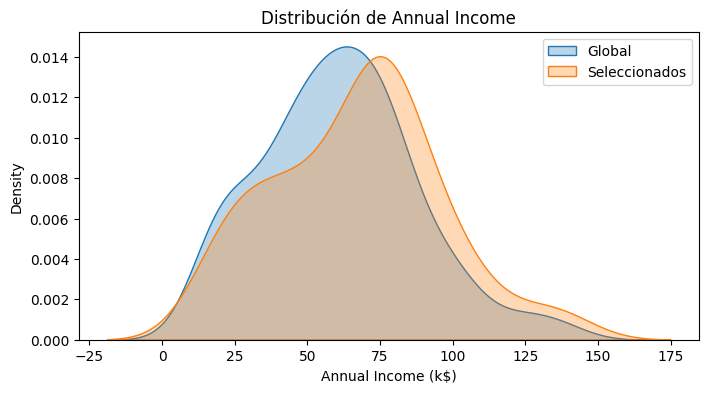

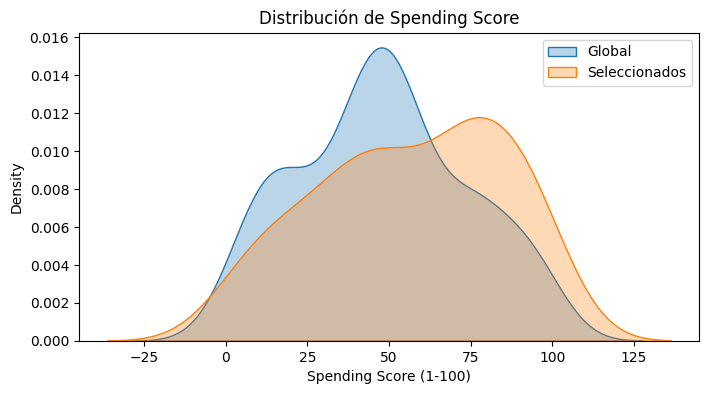

In [26]:
plt.figure(figsize=(8,4))
sns.kdeplot(df_sin_faltantes['Annual_Income'], label='Global', fill=True, alpha=0.3)
sns.kdeplot(clientes_seleccionados['Annual_Income'], label='Seleccionados', fill=True, alpha=0.3)
plt.title('Distribución de Annual Income')
plt.xlabel('Annual Income (k$)')
plt.legend()
plt.show()

plt.figure(figsize=(8,4))
sns.kdeplot(df_sin_faltantes['Spending_Score'], label='Global', fill=True, alpha=0.3)
sns.kdeplot(clientes_seleccionados['Spending_Score'], label='Seleccionados', fill=True, alpha=0.3)
plt.title('Distribución de Spending Score')
plt.xlabel('Spending Score (1-100)')
plt.legend()
plt.show()


**_Agrupa los datos por la variable `Genre` para ambos casos. Gráfica el ingreso promedio y su dispersion. Grafica, luego, el ingreso mediano y su rango intercuartil._**

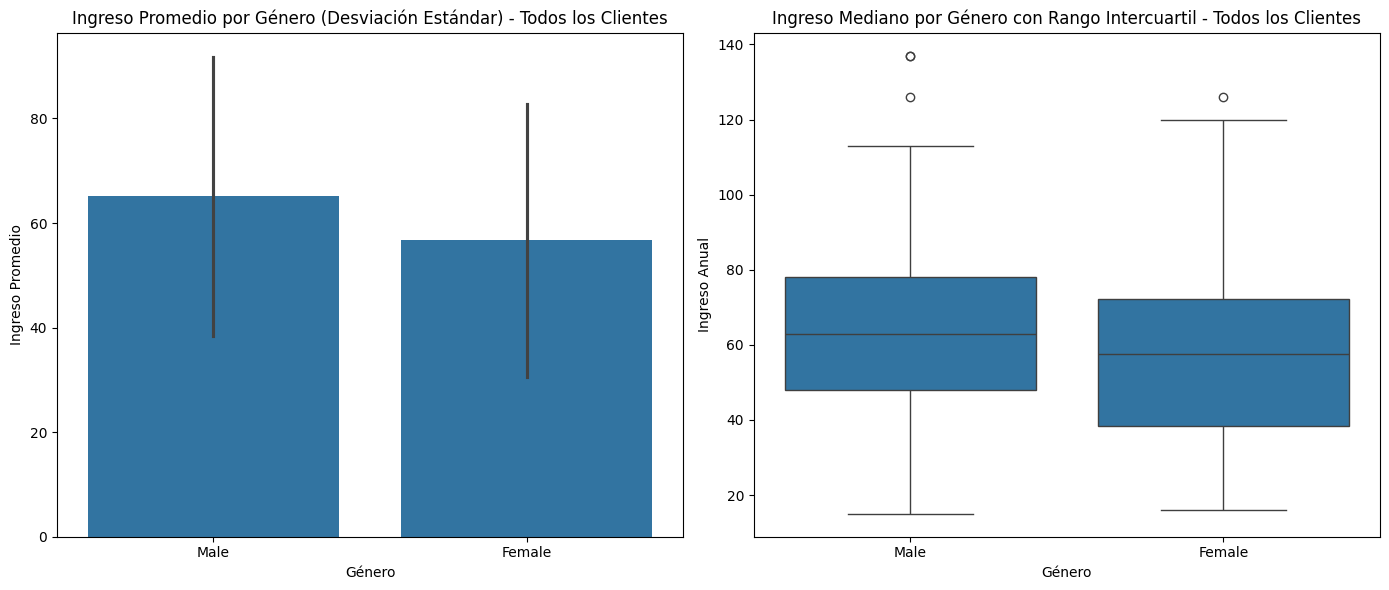

In [27]:
# Para el DataFrame completo (df_sin_faltantes)
plt.figure(figsize=(14, 6))

# Gráfico de ingreso promedio y su dispersión (desviación estándar)
plt.subplot(1, 2, 1)
sns.barplot(x='Genre', y='Annual_Income', data=df_sin_faltantes, errorbar='sd')
plt.title('Ingreso Promedio por Género (Desviación Estándar) - Todos los Clientes')
plt.ylabel('Ingreso Promedio')
plt.xlabel('Género')

# Gráfico de ingreso mediano y su rango intercuartil (IQR)
plt.subplot(1, 2, 2)
sns.boxplot(x='Genre', y='Annual_Income', data=df_sin_faltantes)
plt.title('Ingreso Mediano por Género con Rango Intercuartil - Todos los Clientes')
plt.ylabel('Ingreso Anual')
plt.xlabel('Género')

plt.tight_layout()
plt.show()

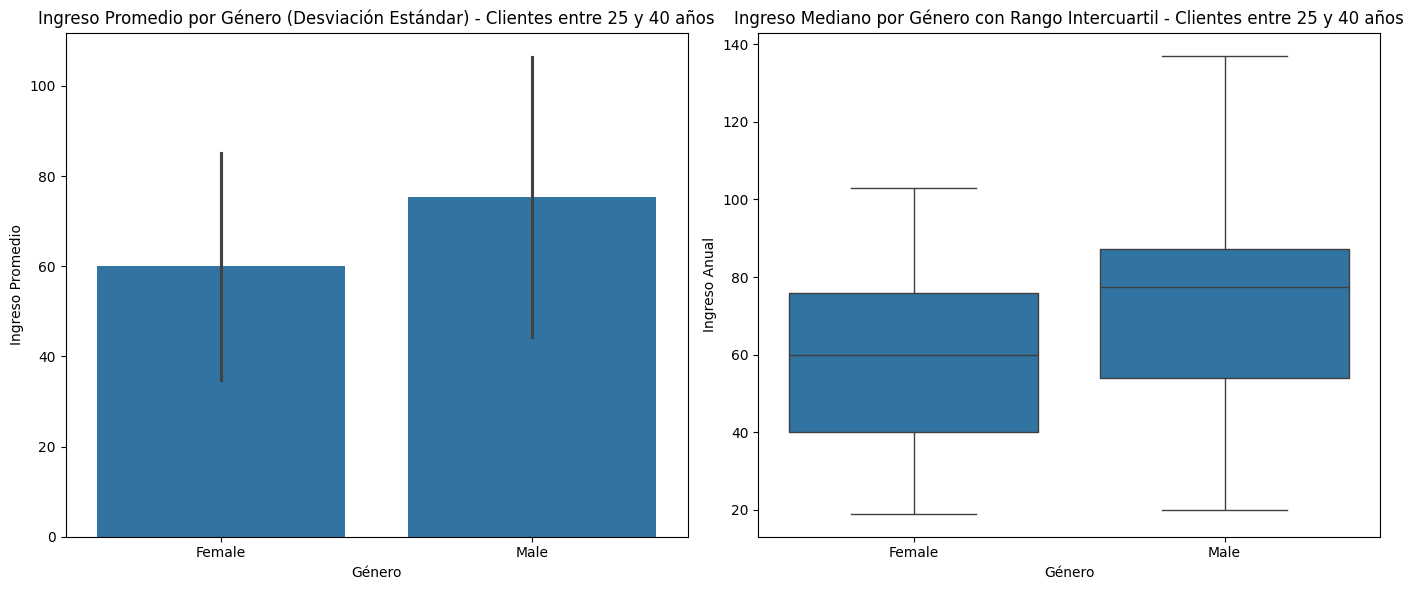

In [28]:
# Para el DataFrame de clientes entre 25 y 40 años (clientes_seleccionados)
plt.figure(figsize=(14, 6))

# Gráfico de ingreso promedio y su dispersión (desviación estándar)
plt.subplot(1, 2, 1)
sns.barplot(x='Genre', y='Annual_Income', data=clientes_seleccionados, errorbar='sd')
plt.title('Ingreso Promedio por Género (Desviación Estándar) - Clientes entre 25 y 40 años')
plt.ylabel('Ingreso Promedio')
plt.xlabel('Género')

# Gráfico de ingreso mediano y su rango intercuartil (IQR)
plt.subplot(1, 2, 2)
sns.boxplot(x='Genre', y='Annual_Income', data=clientes_seleccionados)
plt.title('Ingreso Mediano por Género con Rango Intercuartil - Clientes entre 25 y 40 años')
plt.ylabel('Ingreso Anual')
plt.xlabel('Género')

plt.tight_layout()
plt.show()

🤔 &nbsp; **_¿Existe una correlación entre el sueldo anual y el puntaje de gastos en los clientes seleccionados? ¿Y en todos los clientes en general?_**

In [ ]:
# Se realizan más gráficos con el objetivo de desarrollar más el análisis.

**_Visualiza otros datos que creas relevantes para este analisis._**

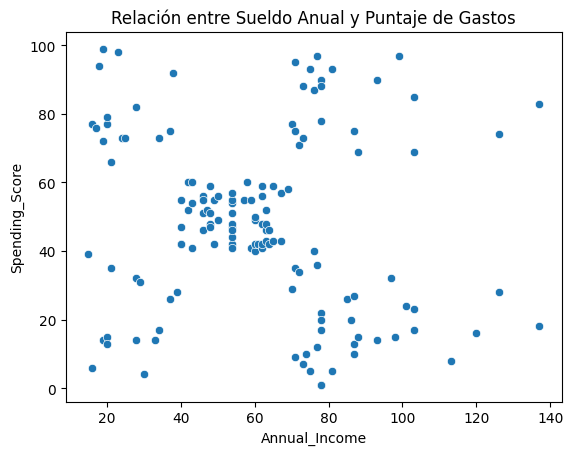

In [29]:
# Gráfico de dispersión (Scatter Plot) para detectar si existe una correlación.
# Cada uno de los puntos representa un cliente
sns.scatterplot(data=df_sin_faltantes, x='Annual_Income', y='Spending_Score')
plt.title("Relación entre Sueldo Anual y Puntaje de Gastos")
plt.show()


Como se observa en la figura la dispersión no tiene una tendencia clara. Los puntos están bastante dispersos por todo el gráfico sin una línea evidente de crecimiento o disminución. Esto podría indicar que no parece haber una correlación lineal fuerte entre el ingreso anual y el puntaje de gastos. Es decir, tener un sueldo más alto no implica necesariamente gastar más, ni viceversa.

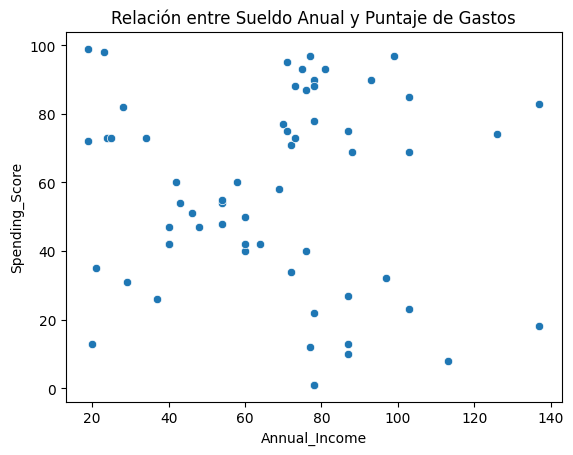

In [30]:
# Gráfico de dispersión (Scatter Plot) para detectar si existe una correlación.
# Cada uno de los puntos representa un cliente, tomando solo los clientes_seleccionados
sns.scatterplot(data=clientes_seleccionados, x='Annual_Income', y='Spending_Score')
plt.title("Relación entre Sueldo Anual y Puntaje de Gastos")
plt.show()

No se observa una correlación fuerte, parece que en este grupo algunos clientes con ingresos medios a altos tienden a tener puntajes de gasto también más altos. Hay menos puntos dispersos en los extremos inferiores, lo cual sugiere que este grupo puede ser un poco más "consistente" en su comportamiento de gasto en relación al ingreso.

#### 💾 &nbsp; GUARDANDO EL ARCHIVO PARA LOS SIGUIENTES PASOS

Los siguientes pasos que vamos a tomar implican la transformación de los datos presentes en el dataset para un correcto ajuste de un modelo a elección. Para no tener que correr nuevamente todo el código, podemos guardar en un archivo `csv` el dataset tal cual lo tenemos ahora.

1) **Utiliza la función `.to_csv()` para guardar tu dataset**. Antes de hacerlo chequea la [documentación](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.to_csv.html).

In [31]:
clientes_seleccionados.to_csv("clientes_seleccionados.csv", index=False)